# 모듈 가져오기 (IMPORT 단계)

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro


from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import accuracy_score #평가함수
from sklearn.preprocessing import StandardScaler #SCALING

#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split

#데이터 scaling => 거리기반 알고리즘은 필수!!!
from statsmodels.api import Logit #로지스틱 회귀FL
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeClassifier
#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [2]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [3]:
#결과 창 확대 (결과값 ...을 넓히고 싶으면 활성화해서 실행하시오)
pd.set_option('display.max_rows', 100000000000) # 최대 줄 수 설정
pd.set_option('display.max_columns', 100000000000) # 최대 열 수 설정 
pd.set_option('display.width', 1000) # 표시할 가로의 길이


## 데이터 받아오기

In [4]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_MACHINE_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)

In [5]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/MFG_PROCESS_MY_COL_DIELEC.csv", engine="python", encoding='EUC-KR')
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [6]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_TAT_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

In [7]:
MFG_PROCESS.head()

,JUDGE,PANEL_ID,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7
0,양품,PNL-01,569,570,552,534,2017,2200,3168,3639.0,3283,3148,3215
1,양품,PNL-02,573,575,558,536,2166,2132,2290,3331.0,3971,3030,2960
2,양품,PNL-03,568,570,553,535,1984,2178,3194,3484.0,3324,3182,3123
3,양품,PNL-04,569,571,551,533,2024,2220,3230,3574.0,3306,3338,3168
4,양품,PNL-05,575,572,556,533,2163,2128,2330,3269.0,3900,3037,2949


In [8]:
MFG_MACHINE['JUDGE'] = MFG_MACHINE['JUDGE'].map({'양품':0,'명점':1})

In [9]:
MFG_PROCESS['JUDGE'] = MFG_PROCESS['JUDGE'].map({'양품':0,'명점':1})

In [10]:
MFG_TAT['JUDGE'] = MFG_TAT['JUDGE'].map({'양품':0,'명점':1})

In [11]:
MFG_PROCESS.head()

,JUDGE,PANEL_ID,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7
0,0,PNL-01,569,570,552,534,2017,2200,3168,3639.0,3283,3148,3215
1,0,PNL-02,573,575,558,536,2166,2132,2290,3331.0,3971,3030,2960
2,0,PNL-03,568,570,553,535,1984,2178,3194,3484.0,3324,3182,3123
3,0,PNL-04,569,571,551,533,2024,2220,3230,3574.0,3306,3338,3168
4,0,PNL-05,575,572,556,533,2163,2128,2330,3269.0,3900,3037,2949


# 로지스틱 회귀 (노스케일) - MFG_PROCESS

In [12]:
df_train, df_test = train_test_split(MFG_PROCESS, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2800, 13)
test data size: (1200, 13)


In [13]:
log_model = Logit.from_formula(""'JUDGE~DIELEC_FIRE_TEMP_KEEP_CH01+DIELEC_FIRE_TEMP_ANEAL_CH01+DIELEC_FIRE_TEMP_ANEAL_CH02+\
                               DIELEC_FIRE_TEMP_ANEAL_CH03+DIELEC_FIRE_EXHAUST_HEAT1+DIELEC_FIRE_EXHAUST_HEAT2+\
                               DIELEC_FIRE_EXHAUST_HEAT3+DIELEC_FIRE_EXHAUST_HEAT4+DIELEC_FIRE_EXHAUST_HEAT5+\
                               DIELEC_FIRE_EXHAUST_HEAT6+DIELEC_FIRE_EXHAUST_HEAT7'"", df_train)
#BUS_DEVELOP_PRES1 제거함 (데이터 값이 전원 0이라서 P값 std err 값 nan 뜸
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.281696
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2788
Method:                           MLE   Df Model:                           11
Date:                Sun, 23 Feb 2020   Pseudo R-squ.:                  0.1835
Time:                        21:31:12   Log-Likelihood:                -788.75
converged:                      False   LL-Null:                       -966.05
Covariance Type:            nonrobust   LLR p-value:                 2.565e-69
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0211    

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1760    0
3399    0
979     0
3431    0
3557    0
dtype: int64

In [15]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.902

Confusion Matrix:
[[1068   11]
 [ 106   15]]


In [16]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
DIELEC_FIRE_TEMP_ANEAL_CH03,0.135256
DIELEC_FIRE_TEMP_KEEP_CH01,0.067374
DIELEC_FIRE_EXHAUST_HEAT1,0.000129
DIELEC_FIRE_EXHAUST_HEAT7,-0.001254
DIELEC_FIRE_EXHAUST_HEAT6,-0.001417
DIELEC_FIRE_EXHAUST_HEAT3,-0.003177
DIELEC_FIRE_EXHAUST_HEAT4,-0.003755
DIELEC_FIRE_EXHAUST_HEAT2,-0.004952
DIELEC_FIRE_EXHAUST_HEAT5,-0.008920
DIELEC_FIRE_TEMP_ANEAL_CH01,-0.034585


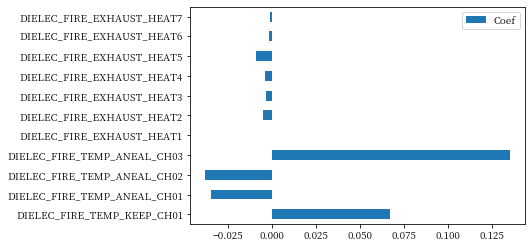

In [17]:
df_logistic_coef.plot.barh(y="Coef")

In [27]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_y = MFG_PROCESS['JUDGE']
df_x = MFG_PROCESS.drop(['JUDGE',"PANEL_ID"], axis=1, inplace=False)
#df_x = MFG_PROCESS.drop(['JUDGE'], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


In [28]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x, df_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [29]:
selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

Selected Variables: Index(['DIELEC_FIRE_TEMP_KEEP_CH01', 'DIELEC_FIRE_TEMP_ANEAL_CH01', 'DIELEC_FIRE_TEMP_ANEAL_CH02', 'DIELEC_FIRE_TEMP_ANEAL_CH03', 'DIELEC_FIRE_EXHAUST_HEAT5'], dtype='object')





Removed Variables: Index(['DIELEC_FIRE_EXHAUST_HEAT1', 'DIELEC_FIRE_EXHAUST_HEAT2', 'DIELEC_FIRE_EXHAUST_HEAT3', 'DIELEC_FIRE_EXHAUST_HEAT4', 'DIELEC_FIRE_EXHAUST_HEAT6', 'DIELEC_FIRE_EXHAUST_HEAT7'], dtype='object')


In [30]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
2,DIELEC_FIRE_TEMP_ANEAL_CH01,1.616
1,DIELEC_FIRE_TEMP_KEEP_CH01,2.072
5,DIELEC_FIRE_EXHAUST_HEAT5,3.622
4,DIELEC_FIRE_TEMP_ANEAL_CH03,3.661
3,DIELEC_FIRE_TEMP_ANEAL_CH02,6.885
0,const,275118.184


# 로지스틱 회귀 (스케일) - MFG_PROCESS

In [31]:
df_char = MFG_PROCESS.select_dtypes(include = "object")
df_numeric = MFG_PROCESS.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,JUDGE,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PANEL_ID
0,-0.345698,-1.109773,-1.475172,-0.596625,-0.034862,-0.850327,0.563151,0.790192,1.669748,-1.067357,0.084330,0.875753,PNL-01
1,-0.345698,0.508709,0.815468,1.108017,0.768862,1.122736,-0.892600,-1.127383,-0.532580,1.373147,-1.117909,-0.800118,PNL-02
2,-0.345698,-1.514393,-1.475172,-0.312518,0.367000,-1.287315,0.092173,0.846976,0.561434,-0.921920,0.430738,0.271125,PNL-03
3,-0.345698,-1.109773,-1.017044,-0.880732,-0.436723,-0.757633,0.991312,0.925601,1.204971,-0.985770,2.020137,0.566867,PNL-04
4,-0.345698,1.317950,-0.558916,0.539803,-0.436723,1.083010,-0.978232,-1.040022,-0.975906,1.121292,-1.046589,-0.872411,PNL-05


In [32]:
df_scaled["JUDGE"] = np.where(df_scaled["JUDGE"]>0,1,0)
df_scaled.head()

,JUDGE,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PANEL_ID
0,0,-1.109773,-1.475172,-0.596625,-0.034862,-0.850327,0.563151,0.790192,1.669748,-1.067357,0.084330,0.875753,PNL-01
1,0,0.508709,0.815468,1.108017,0.768862,1.122736,-0.892600,-1.127383,-0.532580,1.373147,-1.117909,-0.800118,PNL-02
2,0,-1.514393,-1.475172,-0.312518,0.367000,-1.287315,0.092173,0.846976,0.561434,-0.921920,0.430738,0.271125,PNL-03
3,0,-1.109773,-1.017044,-0.880732,-0.436723,-0.757633,0.991312,0.925601,1.204971,-0.985770,2.020137,0.566867,PNL-04
4,0,1.317950,-0.558916,0.539803,-0.436723,1.083010,-0.978232,-1.040022,-0.975906,1.121292,-1.046589,-0.872411,PNL-05


In [33]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [38]:
scaled_log_model = Logit.from_formula('JUDGE~DIELEC_FIRE_TEMP_KEEP_CH01 + DIELEC_FIRE_TEMP_ANEAL_CH01 + DIELEC_FIRE_TEMP_ANEAL_CH02 + DIELEC_FIRE_TEMP_ANEAL_CH03 + DIELEC_FIRE_EXHAUST_HEAT1 + DIELEC_FIRE_EXHAUST_HEAT2 + DIELEC_FIRE_EXHAUST_HEAT3 + DIELEC_FIRE_EXHAUST_HEAT4 + DIELEC_FIRE_EXHAUST_HEAT5 + DIELEC_FIRE_EXHAUST_HEAT6 + DIELEC_FIRE_EXHAUST_HEAT7',df_scaled_train)
scaled_log_result = scaled_log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.280938
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2800
Model:                          Logit   Df Residuals:                     2788
Method:                           MLE   Df Model:                           11
Date:                Sun, 23 Feb 2020   Pseudo R-squ.:                  0.1835
Time:                        21:38:17   Log-Likelihood:                -788.75
converged:                      False   LL-Null:                       -966.05
Covariance Type:            nonrobust   LLR p-value:                 2.565e-69
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0211    

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [39]:
y_pred = scaled_log_result.predict(df_scaled_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_scaled_test["JUDGE"],y_pred_class)))

Accuracy: 0.902

Confusion Matrix:
[[1068   11]
 [ 106   15]]


In [40]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values("Coef", ascending=False)

,Coef
DIELEC_FIRE_TEMP_ANEAL_CH03,0.374948
DIELEC_FIRE_TEMP_KEEP_CH01,0.361818
DIELEC_FIRE_TEMP_ANEAL_CH01,0.046164
DIELEC_FIRE_EXHAUST_HEAT1,0.025707
DIELEC_FIRE_TEMP_ANEAL_CH02,0.002532
DIELEC_FIRE_EXHAUST_HEAT6,-0.152385
DIELEC_FIRE_EXHAUST_HEAT7,-0.211818
DIELEC_FIRE_EXHAUST_HEAT2,-0.247144
DIELEC_FIRE_EXHAUST_HEAT4,-0.465445
DIELEC_FIRE_EXHAUST_HEAT3,-1.124736


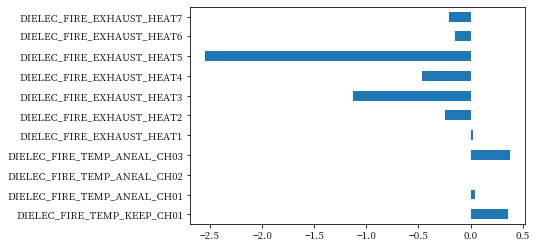

In [41]:
df_log_scaled_coef.plot.barh(y="Coef",legend=False)

In [37]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_y = df_scaled['JUDGE']
df_x = df_scaled.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
#df_x = MFG_PROCESS.drop(['JUDGE'], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Selected Variables: Index(['AG_RTD_TEMP_GLASS_OUT', 'AG_RTD_TEMP_HOOD_START', 'BUS_DEVELOP_TEMP_TANK2', 'BUS_DEVELOP_TEMP_TANK3', 'DIELEC_FIRE_EXHAUST_HEAT3', 'DIELEC_FIRE_EXHAUST_HEAT5', 'DIELEC_FIRE_EXHAUST_HEAT7'], dtype='object')





Removed Variables: Index(['BLACK_RTD_TEMP_GLASS_START', 'BLACK_RTD_TEMP_GLASS_END', 'BLACK_RTD_TEMP_WALL_START', 'BLACK_RTD_TEMP_WALL_MAX', 'BLACK_RTD_PRES_START', 'BLACK_RTD_PRES_END', 'BLACK_RTD_TEMP_GLASS_OUT', 'BLACK_RTD_TEMP_HOOD_START', 'BLACK_RTD_TEMP_HOOD_MAX', 'AG_RTD_TEMP_GLASS_START', 'AG_RTD_TEMP_GLASS_END', 'AG_RTD_TEMP_WALL_START', 'AG_RTD_TEMP_WALL_MAX', 'AG_RTD_PRES_START', 'AG_RTD_PRES_END', 'AG_RTD_TEMP_HOOD_MAX', 'AG_EXPOSURE_TEMP_MASK', 'BUS_DEVELOP_TEMP_OVEN1', 'BUS_DEVELOP_TEMP_OVEN2', 'BUS_DEVELOP_TEMP_OVEN3', 'BUS_DEVELOP_TEMP_TANK1', 'BUS_DEVELOP_PRES2', 'BUS_DEVELOP_PRES3', 'BUS_FIRE_TEMP_KEEP_CH01', 'BUS_FIRE_TEMP_KEEP_CH02', 'BUS_FIRE_TEMP_KEEP_CH03', 'BUS_FIRE_TEMP_ANEAL_CH01', 'BUS_FIRE_TEMP_ANEAL_CH02', 'BUS_FIRE_TEMP_AN

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

,variable,VIF
0,const,1.000
1,AG_RTD_TEMP_GLASS_OUT,1.034
2,AG_RTD_TEMP_HOOD_START,1.205
4,BUS_DEVELOP_TEMP_TANK3,1.449
3,BUS_DEVELOP_TEMP_TANK2,1.483
7,DIELEC_FIRE_EXHAUST_HEAT7,3.162
6,DIELEC_FIRE_EXHAUST_HEAT5,5.841
5,DIELEC_FIRE_EXHAUST_HEAT3,7.888


# 로지스틱 회귀 (노스케일) - MFG_MACHINE

In [38]:
df_train, df_test = train_test_split(MFG_MACHINE, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2787, 28)
test data size: (1195, 28)


In [39]:
log_model = Logit.from_formula(""'JUDGE~C(MC_1BLACK_1PRINT)+C(MC_1BLACK_2RTD)+C(MC_2AG_1PRINT)+C(MC_2AG_2RTD)+C(MC_2AG_3EXPOSURE)+C(MC_3BUS_1DEVELOP)+C(MC_3BUS_2FIRE)+C(MC_4DIELEC_1FIRE)+C(MC_5MGO)+C(MC_6PHOS_1R_1DISPENSER)+C(MC_6PHOS_1R_2DRY)+C(MC_6PHOS_2G_1DISPENSER)+C(MC_6PHOS_2G_2DRY)+C(MC_6PHOS_3B_1DISPENSER)+C(MC_6PHOS_4FIRE)+C(MC_8AGING)'"", df_train)
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.344848
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2768
Method:                           MLE   Df Model:                           18
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                 0.01212
Time:                        17:03:55   Log-Likelihood:                -961.09
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                    0.1689
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                       

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

79      0
3760    0
3406    0
2955    0
1081    0
dtype: int64

In [41]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.907

Confusion Matrix:
[[1084    0]
 [ 111    0]]


In [42]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
C(MC_6PHOS_4FIRE)[T.3호기],0.333416
C(MC_6PHOS_4FIRE)[T.2호기],0.258157
C(MC_5MGO)[T.2호기],0.112367
C(MC_3BUS_2FIRE)[T.2호기],0.060929
C(MC_1BLACK_2RTD)[T.2호기],0.049913
C(MC_6PHOS_3B_1DISPENSER)[T.2호기],0.031469
C(MC_6PHOS_2G_2DRY)[T.2호기],0.019011
C(MC_2AG_1PRINT)[T.2호기],-0.005625
C(MC_4DIELEC_1FIRE)[T.2호기],-0.008649
C(MC_2AG_3EXPOSURE)[T.2호기],-0.047874


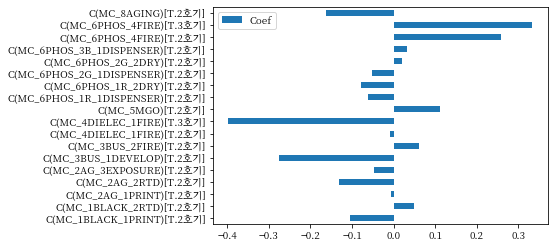

In [43]:
df_logistic_coef.plot.barh(y="Coef")

In [44]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_y = MFG_MACHINE['JUDGE']
df_x = MFG_MACHINE.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Selected Variables: Index(['MC_2AG_1PRINT_1호기', 'MC_2AG_1PRINT_2호기', 'MC_2AG_3EXPOSURE_1호기', 'MC_2AG_3EXPOSURE_2호기', 'MC_4DIELEC_1FIRE_3호기', 'MC_8AGING_1호기', 'MC_8AGING_2호기'], dtype='object')





Removed Variables: Index(['MC_1BLACK_1PRINT_1호기', 'MC_1BLACK_1PRINT_2호기', 'MC_1BLACK_2RTD_1호기', 'MC_1BLACK_2RTD_2호기', 'MC_2AG_2RTD_1호기', 'MC_2AG_2RTD_2호기', 'MC_3BUS_1DEVELOP_1호기', 'MC_3BUS_1DEVELOP_2호기', 'MC_3BUS_2FIRE_1호기', 'MC_3BUS_2FIRE_2호기', 'MC_4DIELEC_1FIRE_1호기', 'MC_4DIELEC_1FIRE_2호기', 'MC_5MGO_1호기', 'MC_5MGO_2호기', 'MC_6PHOS_1R_1DISPENSER_1호기', 'MC_6PHOS_1R_1DISPENSER_2호기', 'MC_6PHOS_1R_2DRY_1호기', 'MC_6PHOS_1R_2DRY_2호기', 'MC_6PHOS_2G_1DISPENSER_1호기', 'MC_6PHOS_2G_1DISPENSER_2호기', 'MC_6PHOS_2G_2DRY_1호기', 'MC_6PHOS_2G_2DRY_2호기', 'MC_6PHOS_3B_1DISPENSER_1호기', 'MC_6PHOS_3B_1DISPENSER_2호기', 'MC_6PHOS_4FIRE_1호기', 'MC_6PHOS_4FIRE_2호기', 'MC_6PHOS_4FIRE_3호기', 'MC_7PASTE_1호기', 'MC_7PASTE_2호기'], dtype='object')


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 로지스틱 회귀 (스케일) - MFG_MACHINE

In [45]:
df_char = MFG_MACHINE.select_dtypes(include = "object")
df_numeric = MFG_MACHINE.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,-0.343839,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,-0.343839,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,-0.343839,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,-0.343839,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,-0.343839,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [46]:
df_scaled["JUDGE"] = np.where(df_scaled["JUDGE"]>0,1,0)
df_scaled.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,0,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,0,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,0,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,0,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,0,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [47]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [48]:
scaled_log_model = Logit.from_formula(""'JUDGE~C(MC_1BLACK_1PRINT)+C(MC_1BLACK_2RTD)+C(MC_2AG_1PRINT)+C(MC_2AG_2RTD)+C(MC_2AG_3EXPOSURE)+C(MC_3BUS_1DEVELOP)+C(MC_3BUS_2FIRE)+C(MC_4DIELEC_1FIRE)+C(MC_5MGO)+C(MC_6PHOS_1R_1DISPENSER)+C(MC_6PHOS_1R_2DRY)+C(MC_6PHOS_2G_1DISPENSER)+C(MC_6PHOS_2G_2DRY)+C(MC_6PHOS_3B_1DISPENSER)+C(MC_6PHOS_4FIRE)+C(MC_7PASTE)+C(MC_8AGING)'"", df_scaled_train)
scaled_log_result = scaled_log_model.fit(method='bfgs')
print(scaled_log_result.summary())

         Current function value: 0.344782
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2767
Method:                           MLE   Df Model:                           19
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                 0.01232
Time:                        17:15:21   Log-Likelihood:                -960.91
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                    0.1976
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                       

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [49]:
y_pred = scaled_log_result.predict(df_scaled_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_scaled_test["JUDGE"],y_pred_class)))

Accuracy: 0.907

Confusion Matrix:
[[1084    0]
 [ 111    0]]


In [51]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values("Coef", ascending=False)

,Coef
C(MC_6PHOS_4FIRE)[T.3호기],0.314360
C(MC_6PHOS_4FIRE)[T.2호기],0.248842
C(MC_5MGO)[T.2호기],0.122801
C(MC_1BLACK_2RTD)[T.2호기],0.056914
C(MC_3BUS_2FIRE)[T.2호기],0.055558
C(MC_7PASTE)[T.2호기],0.051070
C(MC_6PHOS_3B_1DISPENSER)[T.2호기],0.041815
C(MC_6PHOS_2G_2DRY)[T.2호기],0.012013
C(MC_2AG_1PRINT)[T.2호기],0.003520
C(MC_4DIELEC_1FIRE)[T.2호기],-0.002170


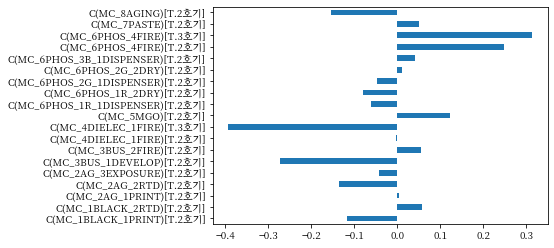

In [52]:
df_log_scaled_coef.plot.barh(y="Coef",legend=False)

In [53]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_y = df_scaled['JUDGE']
df_x = df_scaled.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
#df_x = MFG_PROCESS.drop(['JUDGE'], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Selected Variables: Index(['MC_2AG_1PRINT_1호기', 'MC_2AG_1PRINT_2호기', 'MC_2AG_3EXPOSURE_1호기', 'MC_2AG_3EXPOSURE_2호기', 'MC_4DIELEC_1FIRE_3호기', 'MC_8AGING_1호기', 'MC_8AGING_2호기'], dtype='object')





Removed Variables: Index(['MC_1BLACK_1PRINT_1호기', 'MC_1BLACK_1PRINT_2호기', 'MC_1BLACK_2RTD_1호기', 'MC_1BLACK_2RTD_2호기', 'MC_2AG_2RTD_1호기', 'MC_2AG_2RTD_2호기', 'MC_3BUS_1DEVELOP_1호기', 'MC_3BUS_1DEVELOP_2호기', 'MC_3BUS_2FIRE_1호기', 'MC_3BUS_2FIRE_2호기', 'MC_4DIELEC_1FIRE_1호기', 'MC_4DIELEC_1FIRE_2호기', 'MC_5MGO_1호기', 'MC_5MGO_2호기', 'MC_6PHOS_1R_1DISPENSER_1호기', 'MC_6PHOS_1R_1DISPENSER_2호기', 'MC_6PHOS_1R_2DRY_1호기', 'MC_6PHOS_1R_2DRY_2호기', 'MC_6PHOS_2G_1DISPENSER_1호기', 'MC_6PHOS_2G_1DISPENSER_2호기', 'MC_6PHOS_2G_2DRY_1호기', 'MC_6PHOS_2G_2DRY_2호기', 'MC_6PHOS_3B_1DISPENSER_1호기', 'MC_6PHOS_3B_1DISPENSER_2호기', 'MC_6PHOS_4FIRE_1호기', 'MC_6PHOS_4FIRE_2호기', 'MC_6PHOS_4FIRE_3호기', 'MC_7PASTE_1호기', 'MC_7PASTE_2호기'], dtype='object')


/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: Fut

,variable,VIF
0,const,0.000
5,MC_4DIELEC_1FIRE_3호기,1.003
1,MC_2AG_1PRINT_1호기,inf
2,MC_2AG_1PRINT_2호기,inf
3,MC_2AG_3EXPOSURE_1호기,inf
4,MC_2AG_3EXPOSURE_2호기,inf
6,MC_8AGING_1호기,inf
7,MC_8AGING_2호기,inf


# 로지스틱 회귀 (노스케일) - MFG_TAT

In [54]:
df_train, df_test = train_test_split(MFG_TAT, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2787, 27)
test data size: (1195, 27)


In [55]:
log_model = Logit.from_formula(""'JUDGE~TAT_1BLACK_1PRINT+TAT_1BLACK_2RTD+TAT_2AG_1PRINT+TAT_2AG_2RTD+TAT_2AG_3EXPOSURE+TAT_3BUS_1DEVELOP+TAT_3BUS_2FIRE+TAT_4DIELEC_FIRE+	TAT_5MGO+TAT_6PHOS_1R_1DISPENSER+TAT_6PHOS_1R_2DRY+TAT_6PHOS_2G_1DISPENSER+TAT_6PHOS_2G_2DRY+TAT_6PHOS_3B_1DISPENSER+TAT_6PHOS_4FIRE+TAT_8AGING'"", df_train)
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.337393
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 45
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2770
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                 0.03348
Time:                        17:18:45   Log-Likelihood:                -940.31
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                 6.951e-08
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0198      5.880     

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [56]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)


y_pred_class.head()

79      0
3760    0
3406    0
2955    0
1081    0
dtype: int64

In [57]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.904

Confusion Matrix:
[[1080    4]
 [ 111    0]]


In [58]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
TAT_2AG_1PRINT,0.018239
TAT_6PHOS_1R_1DISPENSER,0.012770
TAT_6PHOS_2G_1DISPENSER,0.010655
TAT_1BLACK_2RTD,0.004363
TAT_5MGO,0.001696
TAT_4DIELEC_FIRE,0.000802
TAT_6PHOS_1R_2DRY,0.000600
TAT_3BUS_2FIRE,0.000300
TAT_8AGING,0.000234
TAT_2AG_3EXPOSURE,0.000002


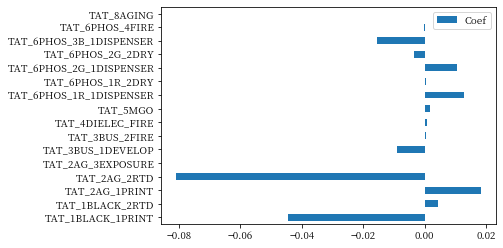

In [73]:
df_logistic_coef.plot.barh(y="Coef")

In [75]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_y = MFG_TAT['JUDGE']
df_x = MFG_TAT.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Selected Variables: Index(['TAT_1BLACK_1PRINT', 'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT', 'TAT_2AG_2RTD', 'TAT_6PHOS_1R_1DISPENSER', 'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_3B_1DISPENSER'], dtype='object')





Removed Variables: Index(['TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP', 'TAT_3BUS_2FIRE', 'TAT_4DIELEC_FIRE', 'TAT_5MGO', 'TAT_6PHOS_1R_2DRY', 'TAT_6PHOS_2G_2DRY', 'TAT_6PHOS_4FIRE', 'TAT_8AGING'], dtype='object')


# 로지스틱 회귀 (스케일) - MFG_TAT

In [59]:
df_char = MFG_TAT.select_dtypes(include = "object")
df_numeric = MFG_TAT.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING
0,-0.343839,-0.358710,0.060533,-0.482179,1.383380,-0.045205,2.131141,-0.278283,-0.354720,-0.187419,-0.412348,-1.125244,0.697344,0.614616,0.221579,0.054153,0.592080,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21
1,-0.343839,-0.358710,-0.709567,-0.167883,0.177817,-0.276339,0.049798,-1.082613,0.403271,-0.187419,-0.012891,0.533212,0.113078,0.118186,0.009124,-0.386878,0.598211,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05
2,-0.343839,-2.058406,0.060533,-2.053662,-0.625892,-0.322565,-0.139415,-0.872788,0.388409,-0.187419,-0.012891,0.248905,1.086855,0.614616,0.221579,-0.664920,4.092815,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49
3,-0.343839,-0.358710,-0.709567,-0.167883,-0.625892,0.370835,2.131141,0.642617,-0.488483,-0.187419,-0.212620,0.391058,-0.276434,0.713902,0.646490,-0.952550,0.604342,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33
4,-0.343839,-0.358710,-0.709567,-0.167883,-0.625892,-0.692379,0.428224,2.158022,-0.324995,0.313455,-0.412348,-0.651399,0.113078,0.515330,0.009124,-0.017754,0.592080,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18


In [60]:
df_scaled["JUDGE"] = np.where(df_scaled["JUDGE"]>0,1,0)
df_scaled.head()

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING
0,0,-0.358710,0.060533,-0.482179,1.383380,-0.045205,2.131141,-0.278283,-0.354720,-0.187419,-0.412348,-1.125244,0.697344,0.614616,0.221579,0.054153,0.592080,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21
1,0,-0.358710,-0.709567,-0.167883,0.177817,-0.276339,0.049798,-1.082613,0.403271,-0.187419,-0.012891,0.533212,0.113078,0.118186,0.009124,-0.386878,0.598211,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05
2,0,-2.058406,0.060533,-2.053662,-0.625892,-0.322565,-0.139415,-0.872788,0.388409,-0.187419,-0.012891,0.248905,1.086855,0.614616,0.221579,-0.664920,4.092815,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49
3,0,-0.358710,-0.709567,-0.167883,-0.625892,0.370835,2.131141,0.642617,-0.488483,-0.187419,-0.212620,0.391058,-0.276434,0.713902,0.646490,-0.952550,0.604342,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33
4,0,-0.358710,-0.709567,-0.167883,-0.625892,-0.692379,0.428224,2.158022,-0.324995,0.313455,-0.412348,-0.651399,0.113078,0.515330,0.009124,-0.017754,0.592080,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18


In [61]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [62]:
scaled_log_model = Logit.from_formula(""'JUDGE~TAT_1BLACK_1PRINT+TAT_1BLACK_2RTD+TAT_2AG_1PRINT+TAT_2AG_2RTD+TAT_2AG_3EXPOSURE+TAT_3BUS_1DEVELOP+TAT_3BUS_2FIRE+TAT_4DIELEC_FIRE+	TAT_5MGO+TAT_6PHOS_1R_1DISPENSER+TAT_6PHOS_1R_2DRY+TAT_6PHOS_2G_1DISPENSER+TAT_6PHOS_2G_2DRY+TAT_6PHOS_3B_1DISPENSER+TAT_6PHOS_4FIRE+TAT_8AGING'"", df_scaled_train)
scaled_log_result = scaled_log_model.fit(method='bfgs')
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.337275
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2770
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                 0.03382
Time:                        17:24:12   Log-Likelihood:                -939.99
converged:                       True   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                 5.351e-08
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept   

In [64]:
y_pred = scaled_log_result.predict(df_scaled_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

print("Accuracy: {0:.3f}\n".format(accuracy_score(df_scaled_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_scaled_test["JUDGE"],y_pred_class)))

Accuracy: 0.903

Confusion Matrix:
[[1079    5]
 [ 111    0]]


In [63]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values("Coef", ascending=False)

,Coef
TAT_4DIELEC_FIRE,0.169543
TAT_6PHOS_1R_1DISPENSER,0.131045
TAT_6PHOS_2G_1DISPENSER,0.108665
TAT_3BUS_2FIRE,0.090818
TAT_1BLACK_2RTD,0.073379
TAT_2AG_1PRINT,0.071379
TAT_8AGING,0.068493
TAT_5MGO,0.048757
TAT_6PHOS_1R_2DRY,0.043132
TAT_2AG_3EXPOSURE,0.002655


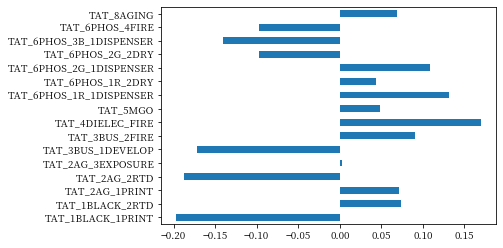

In [65]:
df_log_scaled_coef.plot.barh(y="Coef",legend=False)

In [66]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_y = df_scaled['JUDGE']
df_x = df_scaled.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
#df_x = MFG_PROCESS.drop(['JUDGE'], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

Selected Variables: Index(['TAT_1BLACK_1PRINT', 'TAT_2AG_2RTD', 'TAT_3BUS_1DEVELOP', 'TAT_4DIELEC_FIRE', 'TAT_6PHOS_1R_1DISPENSER', 'TAT_6PHOS_2G_2DRY', 'TAT_6PHOS_3B_1DISPENSER'], dtype='object')





Removed Variables: Index(['TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT', 'TAT_2AG_3EXPOSURE', 'TAT_3BUS_2FIRE', 'TAT_5MGO', 'TAT_6PHOS_1R_2DRY', 'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_4FIRE', 'TAT_8AGING'], dtype='object')


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

,variable,VIF
0,const,1.000
2,TAT_2AG_2RTD,1.009
6,TAT_6PHOS_2G_2DRY,1.016
4,TAT_4DIELEC_FIRE,1.031
1,TAT_1BLACK_1PRINT,1.073
3,TAT_3BUS_1DEVELOP,1.092
7,TAT_6PHOS_3B_1DISPENSER,2.160
5,TAT_6PHOS_1R_1DISPENSER,2.197
